In [1]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

from scipy.signal import get_window
def PlotWindow(w_n, label=None):
    DTFT_res = 1000
    N = len(w_n)
    n = np.arange(N)
    
    plt.subplot(2,1,1)
    plt.plot(n, w_n, label=label)
    plt.xlim([n[0], n[-1]])
    plt.xlabel("Samplenummer (n)")
    
    omega = np.linspace(-pi, pi, DTFT_res)
    W_k = np.fft.fft(w_n, DTFT_res)
    W_k = np.fft.fftshift(W_k)
    
    plt.subplot(2,1,2)
    plt.plot(omega, 20*np.log10(np.abs(W_k)), label=label)
    plt.xlim([-pi, pi])
    ymax = round((20*np.log10(sum(w_n))+10)/20)*20
    plt.ylim(ymax=ymax, ymin=ymax-120)
    plt.xlabel(r"Digital frekvens $\hat{\omega}$")
    
    plt.grid(True)
    plt.tight_layout()

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')


<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Analyzing Window Functions

* **Course AIS2201 - Signalbehandling**
* **Week 38, 2025**
* **Lecturer: Kai Erik Hoff**


# Topics

* Evaluating window functions
* Using the DTFT to analyze window function properties
* Comparing different window functions

## Recap: *windowing*

* A ***window function*** is a useful tool for limiting the effects of spectral leakage.
    * By manipulating the signal segment $x[n], n \in [0, N-1]$ *before* calculating the DFT, we can modify the frequency content towards a more accurate representation
    * The window function $w[n]$ will attribute specific weights to samples in the signal $x[n]$ according to sample number.
    * Truncates samples close to the edges of the window, in order to minimize the discontinuity between $x[N-1]$ and $x[0]$.

<img src="figures/Fig2_HannWindow.png" style="width: 70%; margin-left: 100px" />

# What constitues a "good" window function?

* Minimizing specral leakage?

* How can "degree of spectral leakage" be measured?

* The answer is to analyze window functions using the DTFT!

* We will start with investigating the effects of *not* using a window function

# No windowing = *rectangular window function*

\begin{align*}
\Large x[n] &\Large =  A\cdot \cos\left( \hat{\omega} \cdot n + \phi \right) \\ \\
\Large w_r[n]  &\Large =  u[n] - u[n-N], & \large u[n] = \begin{cases} 1, & 0 \leq n \\ 0, & n < 0 \end{cases} \\ \\
\Large x_w[n] &\Large = x[n] \cdot w_r[n]
\end{align*}

<img src="figures/window_multiplication.svg" style="width: 80%; margin-left: 100px" />

# How does the rectangular window impact frequency content?

* The goal is to identify a *function* $X(\omega)$ which describes the frequency content of $x_w[n]$ for *all* frequencies $-\pi <\hat{\omega} < \pi$.
* A good approach is to identify the frequency content of each "part" which combines to make the sample signal: a rectangular window function $w_r[n]$ and a pure sinusoid $x[n]$

<img src="figures/Fig9_SineWinFourier.png" style="width: 85%; margin-left: 50px" />

## Example 1: 

* Calculate the DTFT of a 5-point rectangular window.

$$w_r[n] = \begin{cases} 1, & n \in \{0, 1, 2, 3, 4 \} \\ 0, & n \notin \{0, 1, 2, 3, 4 \} \end{cases}$$

<img src="figures/w_rect_5pt.svg" style="width: 40%; margin-left: 100px" />

# DTFT av rektangulært vindu

\begin{align}
w_r[n] &= u[n] - u[n-L]\\ \\ 
W_r(\hat{\omega}) &= \sum_{n=-\infty}^{\infty} (u[n]-u[n-L])\cdot e^{-j \hat{\omega}\cdot n} \\
& w_r[n] \text{ er lik } 0 \text{ for alle } n<0 \text{ og } n\geq L \\
&= \sum_{n=0}^{L-1}1\cdot e^{-j\hat{\omega}\cdot n} \\
&= \sum_{n=0}^{L-1}\left(e^{-j\hat{\omega}}\right)^{n}\\
&= 1 + e^{-j\hat{\omega}\cdot 1}+e^{-j\hat{\omega}\cdot 2} + \ldots + e^{-j\hat{\omega}\cdot (L-1)}
\end{align}

* Finite sum of rotating phasors with uniform length

## DTFT demo

Output()

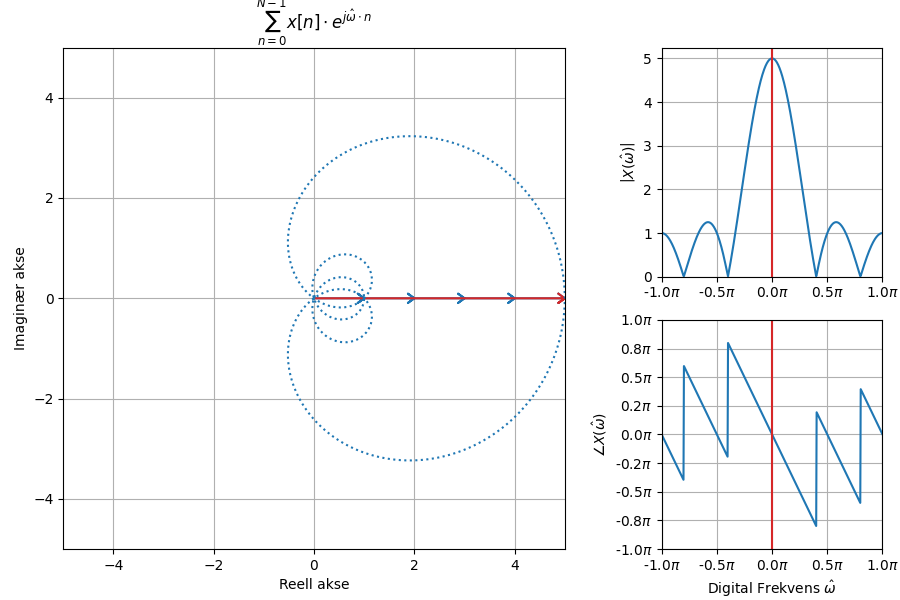

In [2]:
from demos import DTFT_Demo
%matplotlib ipympl
w_n = np.ones(5)
DTFT_Demo(w_n, fig_num = 7, figsize=(9,6))

# DTFT of a rectangular window
* The DTFT $W_r(\hat{\omega})$ of a rectangular window function $w_r[n]$ has a generalizded form given by the.

<img src="figures/Fig12_TransformPair.png" style="width: 85%; margin-left: 50px" />

# DTFT of a Sinusoid

\begin{align}
x[n] &= A\cdot \cos(\hat{\omega}_0\cdot n + \phi ) \\
X(\hat{\omega}) &= \sum_{n=-\infty}^{\infty} A \cdot \cos(\hat{\omega}_0\cdot n + \phi) \cdot e^{-j \cdot \hat{\omega} \cdot n} \\
&= A\pi \cdot \left( \delta(\hat{\omega}-\hat{\omega}_0) \cdot e^{-j \phi} + \delta(\hat{\omega}+\hat{\omega}_0) \cdot e^{j \phi}  \right)
\end{align}

<img src="figures/Fig10_SineSpect.png" style="width: 60%; margin-left: 20%" />

* "Ideal" output of frequency analysis.
    * The DFT of $x[n]$ will converge towrards the ideal as $N \rightarrow \infty$

# Mixing $w_r[n]$ and $x[n]$

* As we explored in the chapter on continuous signals, multiplying any signal (here $w_r[n]$) by a pure sinusoid (here $x[n]$) results in *modulation* or *frequency shifting*
    
| Time Domain: $x[n]$ | Frequency Domain: $X\left(\hat{\omega}\right)$ |
|:-:|:-:|
| $$w_r[n]\cdot cos(\hat{\omega}_0\cdot n)$$ | $$\frac{1}{2}\left(W_r\left(\hat{\omega}-\hat{\omega}_0\right)+W_r\left(\hat{\omega}+\hat{\omega}_0\right)\right)$$|

<img src="figures/window_modulation.svg" style="width: 80%; margin-left: 100px" />

$$\cos(\hat{\omega}_0\cdot n) = \frac{1}{2}e^{j\hat{\omega}_0n} + \frac{1}{2}e^{-j\hat{\omega}_0n}$$

# DTFT of sinusoid segment
* $N$-point DTFT of $x_w[n] = \cos(\hat{\omega}_0\cdot n)\cdot w_r[n]$ is equal to the sum of two frequency-shifted copies of $W_r\left(\hat{\omega}\right)$.

$$X_w\left(\hat{\omega}\right) = \frac{1}{2}\left(W_r\left((\hat{\omega}-\hat{\omega}_0\right)+W_r\left(\hat{\omega}+\hat{\omega}_0\right)\right)$$

<img src="figures/sinusoid_rect_spectrum.svg" style="width: 60%; margin-left: 100px" />

# DFT is sampled DTFT
* **Example:**<br>
16-point DFT equates to taking $16$ samples along the function curve for $X_w\left(\hat{\omega}\right)$.
<img src="figures/sinusoid_spectral_leakage.svg" style="width: 60%; margin-left: 100px" />

# What is the ideal window function?

* The ideal frequency content ofr a window function $w_I[n]$ would be a dirac delta: $W_I\left(\hat{\omega}\right) = \delta(\hat{\omega})$
<img src="figures/Fig16_IdealWindow.png" style="width: 60%; margin-left: 100px" />

* Not obtainable with finite-length windows
    * But deviation of a window function from the ideal indicates the "effectiveness" of the window function

## Analyzing window functions in Python

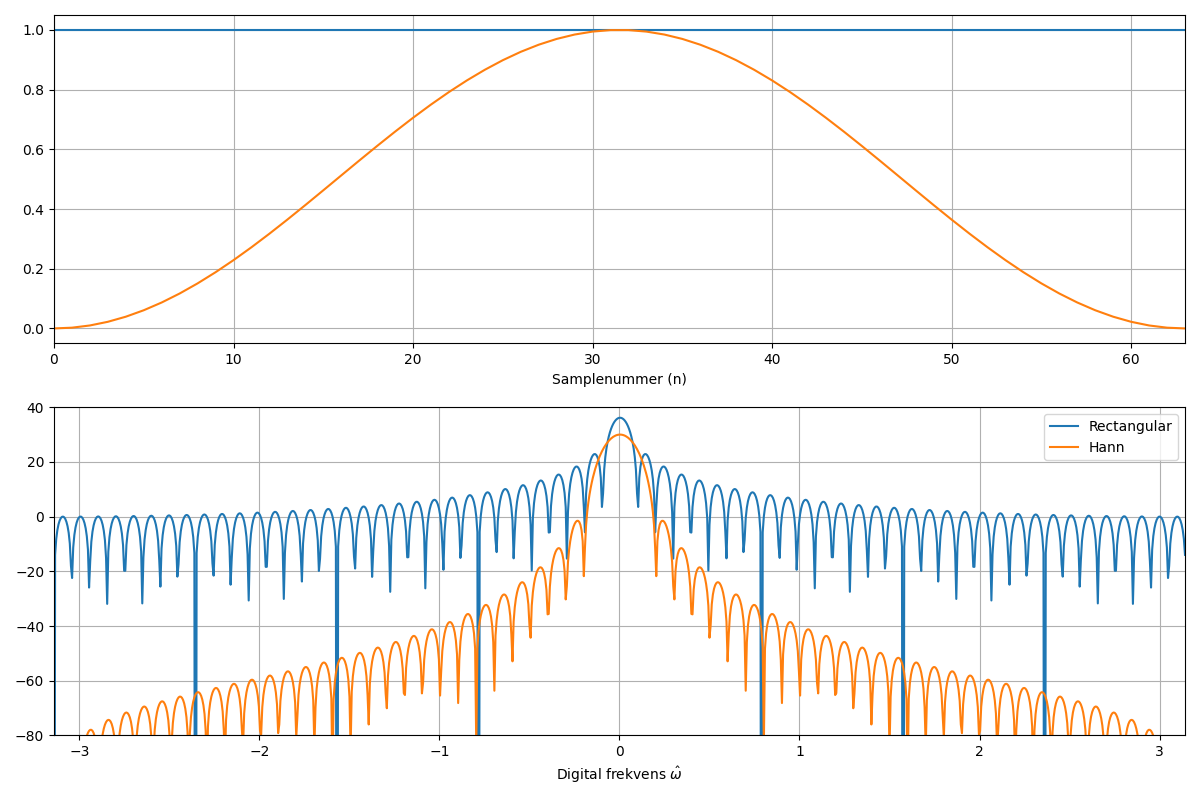

In [13]:
#%matplotlib inline
N = 64
plt.close(8); plt.figure(8, figsize=(12,8))
n = np.arange(N)
wn5 = np.ones(N)
PlotWindow(wn5, label="Rectangular")
wn2 = sig.windows.hann(N)
PlotWindow(wn2, label="Hann")
plt.legend()

# More Window Functions

* Hamming:
$$w[n] = 
\begin{cases}
0.54 - 0.46 \cos \left(2\pi \frac{n}{L-1} \right), & \ \ \ 0\leq n < 1 \\
0, & \ \ \ \text{ellers}
\end{cases}
$$
* There exists a vast plethora of [other window functions](https://docs.scipy.org/doc/scipy/reference/signal.windows.html), and the formulas get complicated fast.
* Rule of thumb:
    - More sidelobe damping comes at the cost of wider main lobe
    - Choice of window comes down to balancing frequency-domain precision with sensitivity (ability to pick out weak components)

* In spectral analysis, a *hamming window* is usually sufficient.
    - Is often the "default" option
* Take care with the use of window functions if the aim is to reconstruct the original signal from frequency representation.
    - Overlapping window functions must add to a *constant* value
    - Make sure the window being used is *non-symmetrical*  (`sym=False`)

## Window function comparison in Python

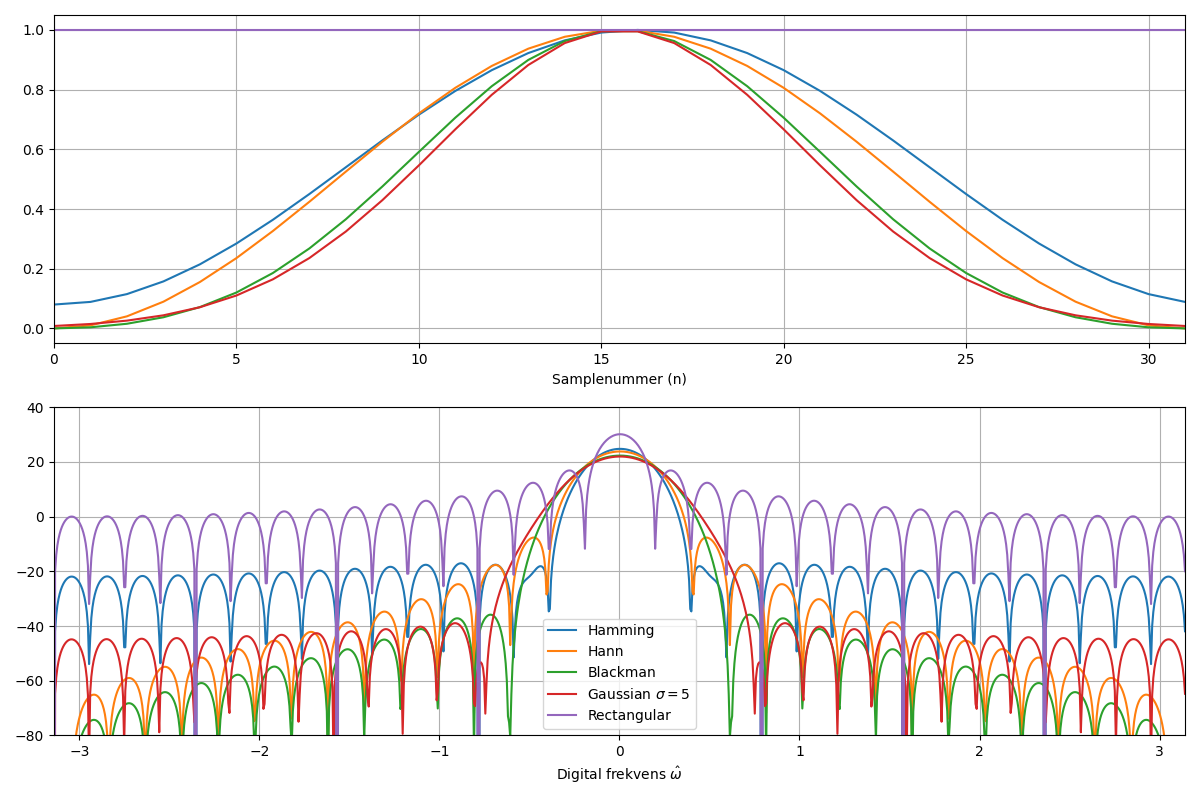

In [12]:
#%matplotlib inline
N = 32
plt.close(8); plt.figure(8, figsize=(12,8))
n = np.arange(N)
wn1 = 0.54 - 0.46*cos(2*pi*n/N)
PlotWindow(wn1, label="Hamming")
wn2 = sig.windows.hann(N)
PlotWindow(wn2, label="Hann")
wn3 = sig.windows.blackman(N)
PlotWindow(wn3, label="Blackman")
wn4 = sig.windows.gaussian(N, std=N//6)
PlotWindow(wn4, label=r"Gaussian $\sigma = %d$"%(N//6))
wn5 = np.ones(N)
PlotWindow(wn5, label="Rectangular")
plt.legend()

# Window functions summarized

* Window functions are a tool in frequency analysis that counteract spectral leakage.
  * This is done by multiplying the signal window of length $N$ samples with an equally long window function before calculating the DFT.
  * The window function will “shrink” the signal samples toward the beginning and end of the window.
* The DTFT of the window function tells us how the spectral leakage will manifest.
  * Two measurements we can make:
    1. Sidelobe attenuation
    2. Main lobe width
  * Typically, there is an inverse relation between the above properties.


# Questions?